Assignment by: Danielle Yaffe, Guy Zalsman, Raz Ohayon

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [3]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [4]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


# To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [5]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [6]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [23]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

#We can assume that a specific artist's songs will be similar 
#(compared to songs from a different artist). 
#Data and value wise, we will have the effect that the data set and training set are almost the same. 
#This will cause a problem because we won't realize that our model is overfitting, because the performance
#of our model on the test set is good. The purpose of testing on data that has not been seen during training
#is to allow to properly evaluate whether overfitting is happening. 
#An appropriat analogy would be: A teacher,  wouldn’t give her students an exam that has got the exact same
#exercises provided as homework: She wants to find out whether they (a) have actually understood the intuition
#behind the methods taught and (b) make sure they haven’t just memorised the homework exercises.

In [8]:
train_xs

array([[ 4.9943570e+01,  2.1471140e+01,  7.3077500e+01, ...,
        -1.8222300e+00, -2.7463480e+01,  2.2632700e+00],
       [ 4.8732150e+01,  1.8429300e+01,  7.0326790e+01, ...,
         1.2049410e+01,  5.8434530e+01,  2.6920610e+01],
       [ 5.0957140e+01,  3.1856020e+01,  5.5818510e+01, ...,
        -5.8590000e-02,  3.9670680e+01, -6.6345000e-01],
       ...,
       [ 4.4376120e+01,  1.6253100e+00,  3.8165560e+01, ...,
        -4.3994800e+00,  2.2429410e+01, -4.1089300e+00],
       [ 4.4887230e+01,  1.4147600e+01, -5.7069400e+00, ...,
         1.1570710e+01,  1.0661509e+02,  1.6808810e+01],
       [ 5.0322010e+01,  6.7119100e+00,  5.4056070e+01, ...,
         3.7773600e+00, -4.2948880e+01,  5.2780000e-02]])

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [9]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds


In [10]:
train_norm_xs

array([[ 1.07878462,  0.39156538,  1.82696048, ..., -0.47047645,
        -0.25536622,  0.04263675],
       [ 0.87950971,  0.33263038,  1.74895879, ...,  0.57086012,
         0.20934046,  1.16111658],
       [ 1.24551381,  0.59277021,  1.33754853, ..., -0.33808094,
         0.10782837, -0.09012199],
       ...,
       [ 0.16295599,  0.00705666,  0.83696509, ..., -0.66394923,
         0.01455341, -0.24641216],
       [ 0.24703203,  0.24967336, -0.40712425, ...,  0.53492437,
         0.46999641,  0.70243594],
       [ 1.14103685,  0.10560845,  1.28757115, ..., -0.05011824,
        -0.33914195, -0.05763313]])

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [11]:
# Write your explanation here

#The model learns to predict using the training data set where the normalization is 
#used to "rewriting" the data, without changing its structure.
#The prediction of the model for given input data should always be the same. 
#Normalizing on the test set breaches this principle, because it makes the prediction 
#for a particular instance depends on the other instances in the test set.

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [12]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here

#While training our model with the data set we want to avoid over fitting. Over fitting is a
#another way to say that our model has memorized the data instead of learning to predict it. 
#If we don't limit the use if test set data we can compromise our model and it is likly 
#that later, for new (different )data, the model will not predict correctly.
#Using the validation set helps us keep the independicy between the model and the test set.
#The validation set helps us avoid over fitting and understand if the model is 
#learning properly meaning the hyper paramteters i.e Learning rate, activation funcion etc.
#fit in the sense that the model will be able to predict correctly. 

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [14]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  e = pow(10, -5)
  return -t * np.log(y + e) - (1 - t) * np.log(1 - y + e)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [15]:
def pred(w, b, X): 
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  z = np.dot(w,np.transpose(X)) + b
  return sigmoid(z)

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [16]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N = np.shape(X)[0] 
  dl_dw = (1/N)*np.dot(np.transpose(X),(y - t))
  dl_db = np.mean(y-t)
  return dl_dw, dl_db 

# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)

In order to compute the gradients we will use the mathametical chain rule.

$$ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial w_i}$$

This holds also for $$ \frac{\partial L}{\partial b} $$ with the final derivative: $$\frac{\partial z}{\partial b}$$
When: 
$$ L = \frac{1}{N} \sum_{j=1}^{N} -t^j \cdot log(y^j) - (1 - t^j)\cdot log(1 - y^j)$$
$$ y^j = \sigma (z^j) = \frac{\mathrm{1} }{\mathrm{1} + e^{-z^j} }  $$
$$ z^j = {w}^T \cdot x^j + b$$

One of the properties of the sigmoid function that was chosen as the activation function is that it's derivative is simply:

$$ \frac{d( \sigma (x)}{\partial dx} = \sigma (x) (1- \sigma (x))$$

Computing each gradient yields:

$$\frac{\partial L}{\partial y} = \frac{1}{N}\sum_{j=1}^{N} \frac{\sigma (z_i)  - t}{\sigma (z_i)}\cdot (1-\sigma (z_i)) $$
$$\frac{\partial y}{\partial z} = \sigma (z) (1- \sigma (z))$$
$$\frac{\partial z}{\partial w_i} = x_i^j  $$
$$\frac{\partial z}{\partial b} = 1  $$

So we get:
$$ \frac{\partial L}{\partial w_i} = \frac{1}{N}\sum_{j=1}^{N} ( t^j -y^j) \cdot x_i^j  $$
$$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{j=1}^{N} ( t^j -y^j)  $$

We can present this as a vector:
$$ \frac{\partial L}{\partial w} = \frac{1}{N}X^T\cdot(y-t)  $$

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [17]:
# Your code goes here
e = pow(10, -5)
b=1
t = np.array([1,1])

y = pred(np.zeros(90), b, np.ones([2, 90]))
y_h = pred(np.zeros(90), b + e, np.ones([2, 90]))

cost_func = cost(y,t)
cost_func_h = cost(y_h,t)

r1 = (cost_func_h - cost_func ) / e
r2 = derivative_cost(np.ones([2, 90]), y, t)[1]

print("The analytical results is -", r1)
print("The algorithm results is - ", r2)

The analytical results is - -0.2689367595898329
The algorithm results is -  -0.2689414213699951


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [18]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

e = pow(10, -5)
w_h = np.zeros(90)
b=1
t = np.array([1,1])
r1 = np.zeros(90)

y = pred(np.zeros(90), b, np.ones([2, 90]))

cost_func = cost(y,t)

for i in range (90):
    w_h[i] += e
    y_h = pred(w_h, b, np.ones([2, 90]))
    cost_func_h = cost(y_h,t)
    r1[i] = (cost_func_h - cost_func ) / e
    w_h[i] -= e
    
r2 = derivative_cost(np.ones([2, 90]), y, t)[0]

print("The analytical results is -", r1)
print("The algorithm results is - ", r2)

The analytical results is - [-0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676 -0.26893676
 -0.26893676 -0.2689367

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [19]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  costs = []
  global train_xs
  global train_ts
  global train_norm_xs

  while iter < max_iters:
    
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_xs))
    train_xs = train_xs[reindex]
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]
  
    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)

      # update w and b
      dL_dw, dL_db = derivative_cost(X, y, t)
      w = w - mu * dL_dw
      b = b - mu * dL_db
      # increment the iteration count
      iter += 1

      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        y_v = pred(w, b, val_norm_xs) #50,000 validation data set
        #to compute faster:
        cost1 = cost(y_v[:20000],val_ts[:20000])
        cost2 = cost(y_v[20000:40000],val_ts[20000:40000])
        cost3 = cost(y_v[40000:],val_ts[40000:])
        val_cost= 1/3*(cost1+cost2+cost3)
        costs.append(val_cost)
        
        acc1 = get_accuracy(y_v[:20000],val_ts[:20000])
        acc2 = get_accuracy(y_v[20000:40000],val_ts[20000:40000])
        acc3 = get_accuracy(y_v[40000:],val_ts[40000:])
        val_acc = 1/3*(acc1+acc2+acc3)
        
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))
        
      if iter >= max_iters:
        break
      
      # Think what parameters you should return for further use
    return w,b,max_iters,costs



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

Convergence with learning rate = 0.001
Iter 10. [Val Acc 44%, Loss 2.875307]
Iter 20. [Val Acc 44%, Loss 2.873388]
Iter 30. [Val Acc 44%, Loss 2.871486]
Iter 40. [Val Acc 44%, Loss 2.869404]
Iter 50. [Val Acc 44%, Loss 2.867351]
Iter 60. [Val Acc 44%, Loss 2.864884]
Iter 70. [Val Acc 44%, Loss 2.862825]
Iter 80. [Val Acc 44%, Loss 2.860977]
Iter 90. [Val Acc 44%, Loss 2.858842]
Iter 100. [Val Acc 44%, Loss 2.856701]
Convergence with learning rate = 10
Iter 10. [Val Acc 65%, Loss 3.803459]
Iter 20. [Val Acc 62%, Loss 3.535728]
Iter 30. [Val Acc 59%, Loss 4.428850]
Iter 40. [Val Acc 66%, Loss 3.857976]
Iter 50. [Val Acc 63%, Loss 4.562414]
Iter 60. [Val Acc 64%, Loss 3.705302]
Iter 70. [Val Acc 62%, Loss 3.615300]
Iter 80. [Val Acc 65%, Loss 3.492718]
Iter 90. [Val Acc 56%, Loss 4.703148]
Iter 100. [Val Acc 60%, Loss 4.548446]


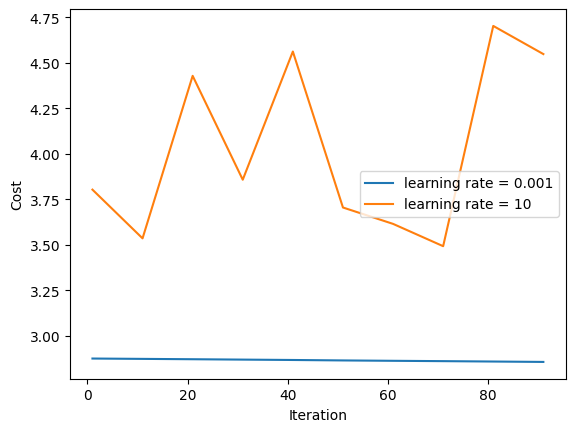

In [23]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
print("Convergence with learning rate = 0.001")
mu_small = 0.001
n1_w,n1_b,iter1, cost1 = run_gradient_descent(w0, b0, mu_small)

x_axis = np.arange(1,iter1,len(cost1))
plt.plot(x_axis,cost1)

print("Convergence with learning rate = 10")
mu_large = 10
n2_w,n2_b,iter2, cost2 = run_gradient_descent(w0, b0, mu_large)
x_axis = np.arange(1,iter2,len(cost2))
plt.plot(x_axis,cost2)


plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(["learning rate = 0.001","learning rate = 10"],loc = 'bottom right')
plt.show()








**Explain and discuss your results here:**

We can recall the GD formula:
$$ \theta_{𝑖+1} = \theta _i - \mu \nabla _{\theta}𝐿(\theta _𝑖) $$
 
The size of the learning rate (LR) determines the affect the gradient will have on the paramters in the model. As we can see from the graphs above, when we used a reletively small learning rate the size of the gradients did not affect update of the new paramters every iteration and so the accuraccy and loss do not change causing the model to learn VERY slowly. With that in mind given we run enough iteration, with this LR we can be sure to converge to a local minima. On the other hand when we choose a large learning rate the the gradients affected the paramters in an extreme way that led the accuraccy and loss to become unstable. This could cause us to miss our goal - converging to a minima. With that said our functions are almost always non convex so actually this LR might help us avoid local minimas. From this conclution we see that picking the correct learning rate is necessary. We want to converga to a minima quickly but we also want to try to fund the global minima rather than a local one.

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

mu =  0.1, Mini Batch size = 100. 
Iter 10. [Val Acc 44%, Loss 2.802709]
Iter 20. [Val Acc 46%, Loss 2.641031]
Iter 30. [Val Acc 47%, Loss 2.508559]
Iter 40. [Val Acc 48%, Loss 2.382208]
Iter 50. [Val Acc 49%, Loss 2.266327]
Iter 60. [Val Acc 51%, Loss 2.169508]
Iter 70. [Val Acc 52%, Loss 2.083912]
Iter 80. [Val Acc 53%, Loss 2.013936]
Iter 90. [Val Acc 54%, Loss 1.936342]
Iter 100. [Val Acc 55%, Loss 1.870329]
mu =  0.1, Mini Batch size = 500. 
Iter 10. [Val Acc 44%, Loss 2.804451]
Iter 20. [Val Acc 46%, Loss 2.652875]
Iter 30. [Val Acc 47%, Loss 2.526407]
Iter 40. [Val Acc 48%, Loss 2.409914]
Iter 50. [Val Acc 49%, Loss 2.303858]
Iter 60. [Val Acc 50%, Loss 2.203384]
Iter 70. [Val Acc 51%, Loss 2.112073]
Iter 80. [Val Acc 53%, Loss 2.027750]
Iter 90. [Val Acc 54%, Loss 1.950852]
Iter 100. [Val Acc 55%, Loss 1.878441]
mu =  0.1, Mini Batch size = 1000. 
Iter 10. [Val Acc 44%, Loss 2.808036]
Iter 20. [Val Acc 45%, Loss 2.652016]
Iter 30. [Val Acc 47%, Loss 2.518907]
Iter 40. [Val Acc 

Iter 80. [Val Acc 67%, Loss 1.280350]
Iter 90. [Val Acc 66%, Loss 1.389359]
Iter 100. [Val Acc 67%, Loss 1.326179]
mu =  5, Mini Batch size = 100. 
Iter 10. [Val Acc 63%, Loss 2.789233]
Iter 20. [Val Acc 59%, Loss 2.591553]
Iter 30. [Val Acc 64%, Loss 2.219633]
Iter 40. [Val Acc 68%, Loss 2.640909]
Iter 50. [Val Acc 67%, Loss 1.950795]
Iter 60. [Val Acc 67%, Loss 2.186887]
Iter 70. [Val Acc 63%, Loss 2.702353]
Iter 80. [Val Acc 67%, Loss 2.592811]
Iter 90. [Val Acc 69%, Loss 2.499459]
Iter 100. [Val Acc 62%, Loss 2.654573]
mu =  5, Mini Batch size = 500. 
Iter 10. [Val Acc 59%, Loss 2.892538]
Iter 20. [Val Acc 61%, Loss 2.809872]
Iter 30. [Val Acc 60%, Loss 2.727401]
Iter 40. [Val Acc 57%, Loss 3.279812]
Iter 50. [Val Acc 64%, Loss 2.465831]
Iter 60. [Val Acc 60%, Loss 2.774923]
Iter 70. [Val Acc 59%, Loss 3.023854]
Iter 80. [Val Acc 64%, Loss 2.574117]
Iter 90. [Val Acc 63%, Loss 2.561319]
Iter 100. [Val Acc 61%, Loss 2.786866]
mu =  5, Mini Batch size = 1000. 
Iter 10. [Val Acc 62%, 

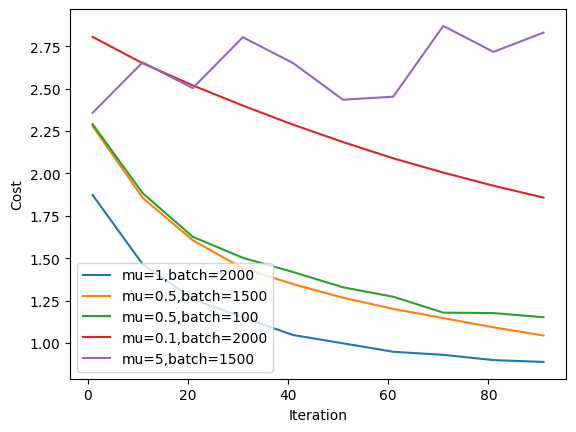

In [20]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
test_mu = [0.1,0.5,1,2,5]
test_minibatch = [100,500,1000,1500,2000]
legend = []
dataset = []
x_axis_l = []
y_axis_l = []
graphs = []

for t_mu in test_mu:
    for mb in test_minibatch:
        print("mu =  %s, Mini Batch size = %d. " % (t_mu, mb))
        w_g,b_g,itereration_v,cost_arr = run_gradient_descent(w0, b0, t_mu, mb)
        dataset.append([w_g,b_g,cost_arr[-1]])
        x_axis = np.arange(1,itereration_v,len(cost_arr))
        y_axis = cost_arr
        graphs.append([x_axis,y_axis,cost_arr[-1],t_mu, mb])


dataset = sorted(dataset,key=lambda l:l[2])
graphs = sorted(graphs,key=lambda l: l[2])
graph1 = graphs[1]
graph2 = graphs[5]
graph3 = graphs[10]
graph4 = graphs[15]
graph5 = graphs[-1]

plt.plot(graph1[0],graph1[1], label = "mu={0},batch={1}".format(graph1[3],graph1[4]))
plt.plot(graph2[0],graph2[1], label = "mu={0},batch={1}".format(graph2[3],graph2[4])) 
plt.plot(graph3[0],graph3[1], label = "mu={0},batch={1}".format(graph3[3],graph3[4]))
plt.plot(graph4[0],graph4[1], label = "mu={0},batch={1}".format(graph4[3],graph4[4])) 
plt.plot(graph5[0],graph5[1], label = "mu={0},batch={1}".format(graph5[3],graph5[4])) 
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(loc ="lower left")
plt.show()

In [23]:
best_w = dataset[0][0]
best_b = dataset[0][1]
print('w_optimal = ', best_w)
print('b_optimal = ',best_b)

w_optimal =  [ 1.39956466e+00 -9.16489187e-01 -4.34386045e-01  1.22210657e-01
 -1.31530510e-01 -6.53477365e-01 -3.49223320e-02 -5.49930875e-02
 -9.11999026e-02 -8.69860212e-02 -1.89817846e-01  2.17724461e-02
  1.50183567e-01  1.23637682e-01 -3.39643060e-01  4.44839531e-01
 -2.16254220e-02 -1.29997250e-01  3.26374690e-01  4.00643555e-01
 -5.48959961e-03  8.72896411e-02  1.31672135e-01  1.83647598e-01
 -8.49089011e-02 -4.78797411e-02  4.29121646e-01 -7.43554774e-02
  2.02401727e-02  1.63016061e-01 -5.94375840e-02 -5.22810990e-02
 -2.68335081e-03  3.39206987e-02 -7.70563426e-02  1.86578990e-01
 -3.68522635e-02  2.15658868e-01  7.00837222e-02  2.09993851e-02
 -1.50720930e-01 -5.82541330e-02 -1.90752734e-02 -4.13621212e-02
 -1.55313073e-02 -2.56379932e-01  4.11655095e-02 -1.04295728e-01
 -1.16766567e-01  2.09962882e-02 -3.10404605e-02  3.25587868e-04
  4.36623853e-02 -2.54847934e-02 -1.47586108e-01  1.26232596e-02
 -1.46414405e-01 -3.29215872e-02 -7.12965331e-04  7.29309358e-02
  6.86884461

#### **Explain and discuss your results here:**
In order to find the optimal learning rate and size batch we used 2 loops that test possible combinations between differet learning rate and batch size values. 
We then evaluated the validation Cost values for each of the options and choose the combination that yields the minimum.
We ploted onto a graph a few of the learning curves that where calculated. of course the blue graph coverges as wanted and in the best way. 
Here we can also see again the infulence of the learning rate value affecting speed and divergence. Simultaniously we see the effect of the batch size, small batch size cause an addition of noise. A large batch size is closer to the true gradient but increses computaion.


### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [24]:
# Write your code here

train=pred(best_w,best_b,train_norm_xs)
val=pred(best_w,best_b,val_norm_xs)
test=pred(best_w,best_b,test_norm_xs)

train_acc = get_accuracy(train, train_ts)
val_acc = get_accuracy(val, val_ts)
test_acc = get_accuracy(test, test_ts)

print('train_acc = ', train_acc* 100, '%', ' val_acc = ', val_acc* 100, '%', ' test_acc = ', test_acc* 100, '%')


train_acc =  72.42231971284579 %  val_acc =  72.396 %  test_acc =  71.73736199883788 %


**Explain and discuss your results here:**

There is a very small difference between the three value. The model trained using the training data, trying to learn the behavior of the data. Given we trained the model enough and got the optimal (W,b) parameters, we know that given the training data it will predict correctly. Because we sis not train the model the the validation or the test sets it makes sens that the accuracy is lower but with that said we can confidently say that the model predicted well and that we did not overfit. 

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [21]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs,train_ts)

train=model.predict(train_norm_xs)
val=model.predict(val_norm_xs)
test=model.predict(test_norm_xs)

train_acc = get_accuracy(train, train_ts)
val_acc = get_accuracy(val, val_ts)
test_acc = get_accuracy(test, test_ts)


print('train_acc = ', train_acc* 100, '%', ' val_acc = ', val_acc* 100, '%', ' test_acc = ', test_acc* 100, '%')

C:\Users\dyaffe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  73.24438321066434 %  val_acc =  73.566 %  test_acc =  72.66899089676545 %


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
